number of time points =  100000


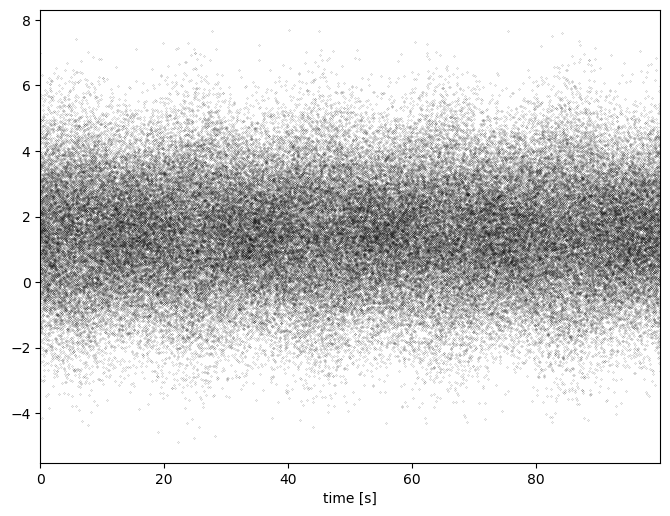

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# create data for FFT analysis
dt = 0.001   # time step size
n = 100_000   # number of data points
# time vector ranging from 0 to 100seconds 
t = np.linspace(0,dt * (n-1) , n)
print('number of time points = ', t.shape[0])

# noise signal, using Box-Muller transformation
mu = 1.5 # noise mean
sigma = 1.0 # standard deviation for the normal distributed noise
u1 = np.random.rand(n)
u2 = np.random.rand(n)
z = np.sqrt(-2.0*np.log(u1)) * np.cos(2.0*np.pi*u2)
y_noise = mu + z * sigma

# sinus component
omega1 = 350 * np.pi * 2 # angular frequency
amp1 = 1 # amplitude
y1 = amp1 * np.sin(omega1*t)

# sinus component
omega2 = 300 * np.pi * 2 # angular frequency
amp2 = 0.66 # amplitude
y2 = amp2 * np.sin(omega2*t)

# amplitude modulated sinus component
omega3 = 200 * np.pi * 2 # angular frequency
omega_am = 0.05 * np.pi * 2 # modulation amplitude
amp3 = (1 + 0.5*np.sin(omega_am*t)) # amplitude
y3 = amp3 * np.sin(omega3*t)

# frequency modulated sinus component
omega_fm = 1000*np.sin(0.02*t*np.pi * 2) # modulation frequency
omega4 = 100 * np.pi * 2 # angular frequency
amp4 = 1  # amplitude
y4 = amp4 * np.sin(omega4*t + omega_fm)

# combined signal
y = y1 + y2 + y3 + y4 + y_noise

# time domain plot
fig=plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.plot(t, y,'.k',markersize=0.2)
ax.set_xlim([t[0],t[-1]])
plt.xlabel('time [s]')
plt.show()
plt.close()

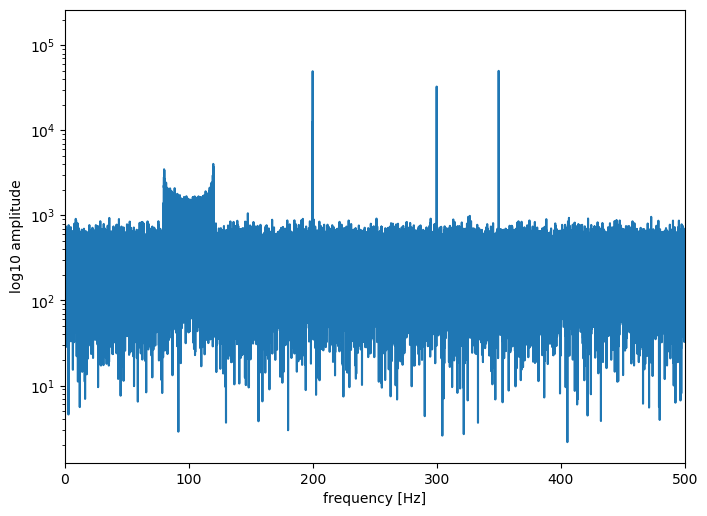

In [2]:
from scipy.fft import fft
# FFT analysis
y_fft = fft(y)

n2 = int(0.5*n)
y_fft = y_fft[:n2]
y_fft_amp = np.abs(y_fft)

tf = np.linspace(0,1/(2*dt), n2 )

fig=plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
# semi logarithmic plot (x-axis linear, y-axis log10)
ax.semilogy(tf, y_fft_amp)
ax.set_xlim([tf[0],tf[-1]])
plt.xlabel('frequency [Hz]')
plt.ylabel('log10 amplitude')
plt.show()
plt.close()

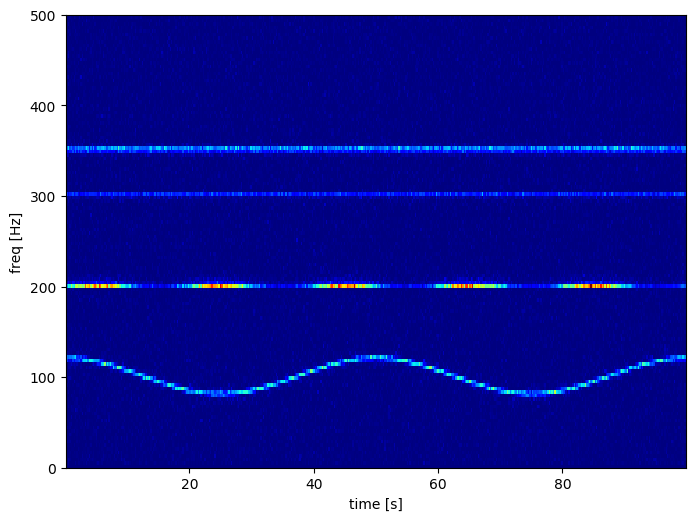

In [3]:
from scipy import signal

fs = 1.0/dt
f, t, Sxx = signal.spectrogram(y, fs)

fig=plt.figure(figsize=(8,6), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
plt.jet()
ax.pcolormesh(t, f, Sxx, shading='flat') # shading='flat' shading='gouraud'
plt.ylabel('freq [Hz]')
plt.xlabel('time [s]')
plt.show()
